In [1]:
# pip install keras-self-attention
import os, time, gc, sys, io, pdb
import datetime, keras, pickle
import warnings, random, statistics
#
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot
import statistics as sts
#
from scipy import stats
from pandas import Series
from matplotlib.ticker import MultipleLocator, ScalarFormatter
#
# tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
def load_output_preprocessed_data(path, win, tr_tst, stock, mdl, multi=False):
        '''
        Returns the preprocessed data as a list of objects
        
        Arguments:
        path - path to the preprocessed data
        win - window size
        multi - boolean value to indicate if the data is multivariate or not
        '''

        if multi == False:
            fdat = f'D:/Escritorio/TFG/Finance-AI/DataProcessed/output/{win}/{tr_tst}/{stock}-{mdl}-output.pkl'

        else:
            fdat = f'D:/Escritorio/TFG/Finance-AI/DataProcessed/output/{win}/{tr_tst}/{stock}-{mdl}-m-output.pkl'

        with (open(fdat, "rb")) as openfile:
            while True:
                try:
                    path      = pickle.load(openfile)
                    fdat     = pickle.load(openfile)
                    lahead    = pickle.load(openfile)
                    lpar      =pickle.load(openfile)
                    tot_res   = pickle.load(openfile)
                except EOFError:
                    break
        return path, fdat, lahead, lpar, tot_res

In [4]:
tr_tst = 0.7
processed_path = f"D:/Escritorio/TFG/Finance-AI/DataProcessed/{tr_tst}"
win_size = 5
stock = 'AAPL'
multi = False
mdl  = 'lstm'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, stock, mdl, multi)
win, n_ftrs, tr_tst, deep = lpar

In [6]:
tot_res['OUT_MODEL']['scenario_1']['AAPL'].keys()


dict_keys([1, 7, 14, 30, 90])

In [45]:
tot_res['INPUT_DATA']['scenario_1'][14]['trainX'].shape

(1397, 5)

In [5]:
tot_res['OUT_MODEL'].keys()

dict_keys(['MODEL_scenario_1', 'scenario_1'])

In [15]:
res1 = tot_res['OUT_MODEL']['scenario_1']['AAPL']
res1.keys()

dict_keys([1])

In [7]:
res1 = tot_res['OUT_MODEL']['scenario_1']['AAPL']
stck = 'AAPL'
ahead= 1
itr  = 0
DYs  = res1[ahead]['DY']
DY   = DYs.loc[itr]

In [8]:
print(res1[1]['MSEY'])
print(res1[1]['MSEP'])

0    8.124114
1    8.124114
2    8.124114
3    8.124114
4    8.124114
5    8.124114
6    8.124114
7    8.124114
8    8.124114
9    8.124114
Name: MSEY, dtype: float64
0    0.553205
1    0.560202
2    1.207803
3    0.871452
4    0.573436
5    0.580910
6    0.658292
7    0.376646
8    0.307134
9    0.327531
Name: MSEP, dtype: float64


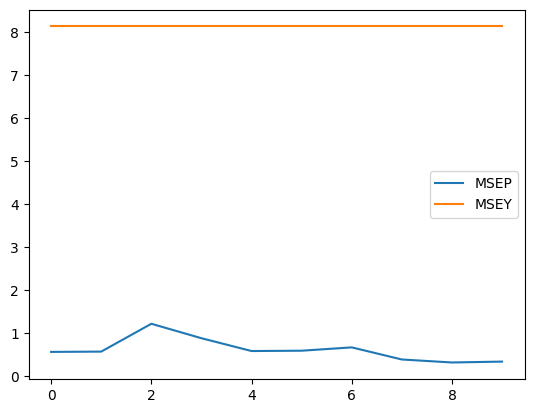

In [9]:
plt.plot(res1[1]['MSEP'], label='MSEP')
plt.plot(res1[1]['MSEY'], label='MSEY')
plt.legend()
plt.show()

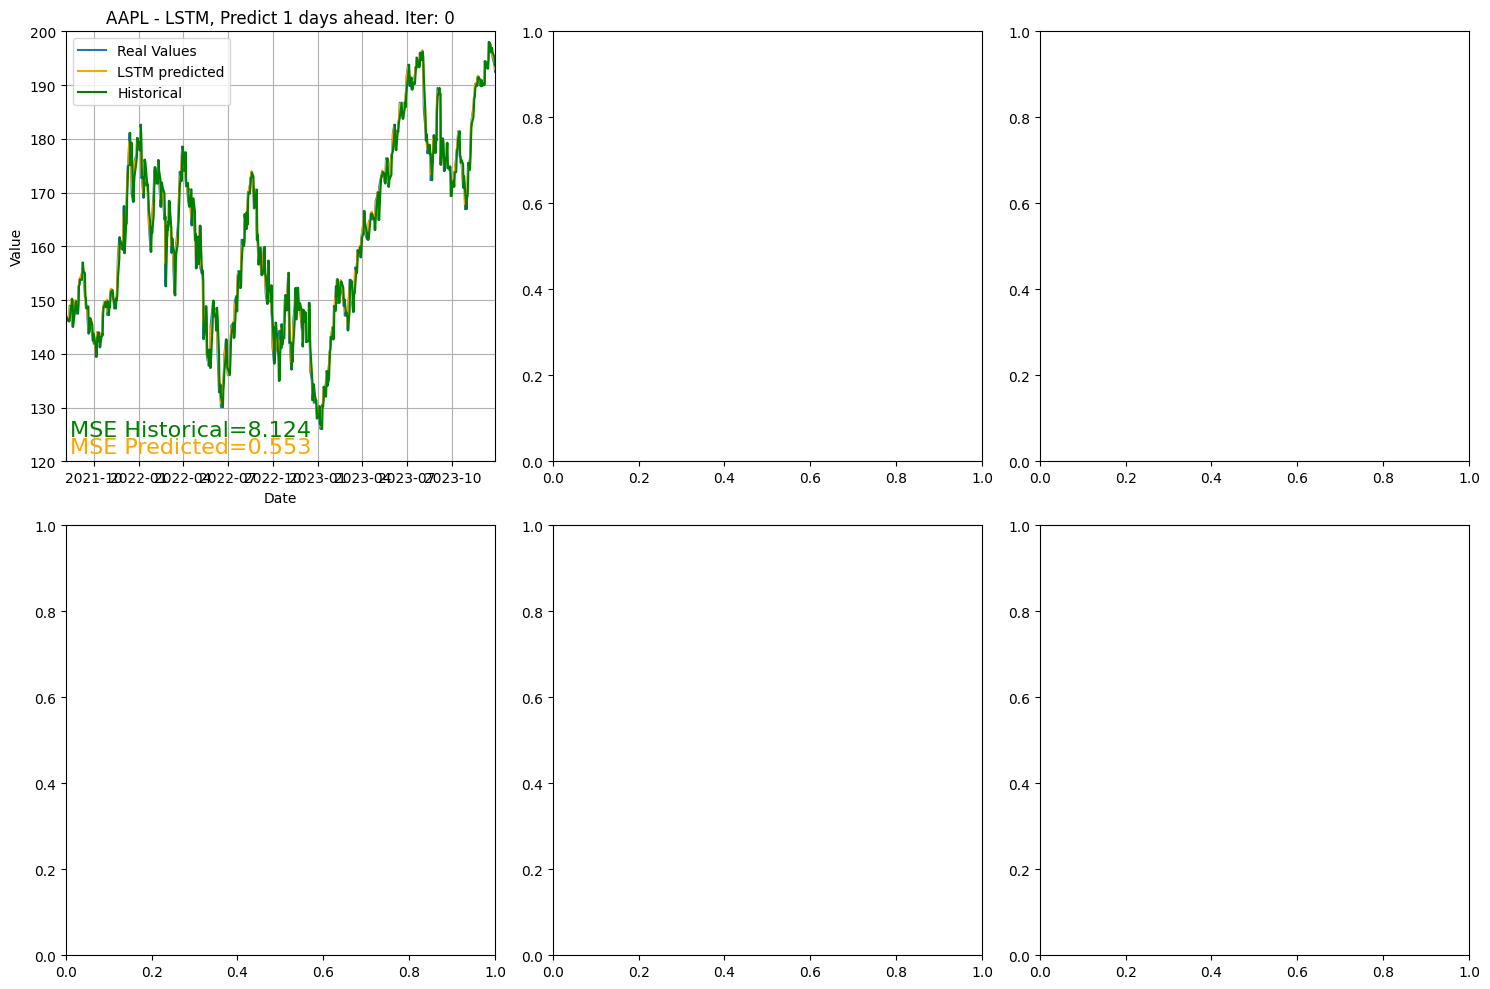

In [16]:
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="LSTM predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')

# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1]):
    res1 = tot_res['OUT_MODEL']['scenario_1']['AAPL']
    mdl = 'lstm'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(120, 200)

path = f'D:\Escritorio\TFG\Finance-AI\Figures/{tr_tst}/'
if not os.path.exists(path):
    os.makedirs(path)

plt.tight_layout()
#plt.show()
figfich = path + f'{mdl}-{stck}-{itr}.png'.format(mdl, stck, itr)
plt.savefig(figfich)
